<h1><center>CMPE 462 - Project 1<br>Binary Classification with Logistic Regression<br>Due: April 23, 2020, 23:59</center></h1>

* **Student ID1:** 2019700006
* **Student ID2:** 2014401126
* **Student ID3:** 2011400369

# Overview

In this project, you are going to implement logistic regression from scratch. You are provided
a subset of the famous handwritten digit dataset called MNIST. In the subset, you will find images of digit 1 and 5. Therefore, you will be solving a binary classification problem. The project includes feature extraction, model training, and evaluation steps.

First, you will load and visualize the data portion we have provided to you and then extract two different set of features to build a classifier on. When you extracted the desired features, you will run your logistic regression implementation with gradient descent on the representations to classify digits into 1 and 5. You will experiment with different learning rates  and regularization parameter ($\lambda$) and find the optimal $\lambda$ with 5-fold cross validation. Finally, you will evaluate the implemented models, decide which is the best performing one and visualize a decision boundary.

Follow the steps on this notebook that would guide you through the solution step-by-step. Make sure that the notebook reports your work properly and add comments and opinions when necessary.

**IMPORTANT NOTE:** You are allowed to use third-party libraries such as `numpy` and `matplotlib` to help you implement necessary procedures. However, you should not import any function that accomplishes the task itself. For instance, you can use `numpy` arrays for matrix operations, but you cannot use `scikit-learn` to implement cross validation.

## Task 1: Feature Extraction (35 Pts)

Load the training/test data and labels as numpy arrays (Hint:`np.load`). Train and test data are 1561x256 and 424x256 dimensional matrices, respectively. Each row in the
aforementioned matrices corresponds to an image of a digit. The 256 pixels correspond to a 16x16 image. Label 1 is assigned to digit 1 and label -1 is assigned to digit 5.

In [1]:
# importing necessary libraries & methods
import numpy as np
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt

# loading train & test datasets with labels
train_data = np.load('train_data.npy')
train_labels = np.load('train_labels.npy')
test_data = np.load('test_data.npy')
test_labels = np.load('test_labels.npy')

**(5 points)** Display two of the digit images, one for digit 1 and one for digit 5. You can use `imshow` function of `matplotlib` library with a suitable colormap. You will first need to reshape 256 pixels to a 16x16 matrix. 

<Figure size 432x288 with 0 Axes>

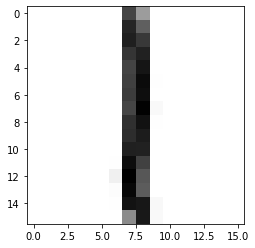

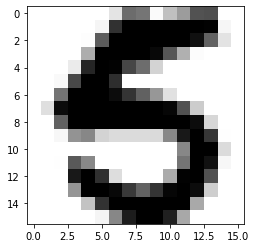

<Figure size 432x288 with 0 Axes>

In [2]:
# selecting one image array from each label
sample_pic_of_1 = train_data[3]
sample_pic_of_5 = train_data[1500]

first_image = np.array(sample_pic_of_1, dtype='float')
second_image = np.array(sample_pic_of_5, dtype='float')

# reshaping into 16x16 image
pixels1 = first_image.reshape((16, 16))
pixels5 = second_image.reshape((16, 16))

# showing samples of digit 1 & 5
plt.imshow(pixels1, cmap=plt.cm.binary)
plt.figure()
plt.imshow(pixels5, cmap=plt.cm.binary)
plt.figure()

**(10 points) Implementing Representation 1:** Extract the **symmetry** and **average intensity** features discussed in the class (see logistic regression lecture notes). To compute the intensity features, compute the average pixel value of the image, and for the symmetry feature, compute the negative of the norm of the difference between the image and its y-axis symmetrical. Search numpy's documentation to find the suitable function at each step. You should extract these two features for each image in the training and test sets. As a result, you should obtain a training data matrix of size 1561x2 and test data matrix of size 424x2.

Throughout the notebook, we will refer the representation with these two features as **Representation 1** 

In [3]:
# Feature Extraction for Representation 1

trainsyinfo = [] # train dataset symmetry feature
testsyinfo = [] # test dataset symmetry feature
trainintensity = [] # train dataset intensity feature
testintensity = [] # test dataset intensity feature

for i in range(len(train_data)): # for each image in train data
    
    each_image = train_data[i]
    each_image = np.array(each_image, dtype='float')
    pixel_form = each_image.reshape((16, 16))
    pixel_form = pixel_form.astype('float64')
    
    # symmetry feature extraction
    imgflip = np.fliplr(pixel_form)
    symmetry = pixel_form - imgflip
    norm = np.linalg.norm(symmetry)
    trainsyinfo.append(norm)
    
    # intensity feature extraction
    intensity = pixel_form.mean()
    trainintensity.append(intensity)

for i in range(len(test_data)): # for each image in test data
    
    each_image = test_data[i]
    each_image = np.array(each_image, dtype='float')
    pixel_form = each_image.reshape((16, 16))
    pixel_form = pixel_form.astype('float64')
    
    # symmetry feature extraction
    imgflip = np.fliplr(pixel_form)
    symmetry = pixel_form - imgflip
    norm = np.linalg.norm(symmetry)
    testsyinfo.append(norm)
    
    # intensity feature extraction
    intensity = pixel_form.mean()
    testintensity.append(intensity)

In [4]:
def normalize2(feature): # normalization to 0-1 range
    min_feat = np.min(feature)
    max_feat = np.max(feature)
    feature = (feature - min_feat) / (max_feat-min_feat)
    return feature

In [5]:
def normalize(feature): # normalization of 0-mean 1-standard deviation 
    mean_feat = np.mean(feature)
    std_feat = np.std(feature)
    feature = (feature - mean_feat) / std_feat
    return feature

In [6]:
trintnp = np.asarray(normalize2(trainintensity))
testintnp = np.asarray(normalize2(testintensity))
trsynp = np.asarray(normalize2(trainsyinfo))
testsynp = np.asarray(normalize2(testsyinfo))
type(trintnp) # converting our list to ndarray

numpy.ndarray

In [7]:
#and here we merge 2 'feature' columns, symmetry and intensity and create our training data
traindatafe = np.column_stack([trintnp, trsynp])  
traindatafe.shape

(1561, 2)

In [8]:
testdatafe = np.column_stack([testintnp, testsynp])  
testdatafe.shape

(424, 2)

**(5 points)** Provide two scatter plots, one for training and one for test data. The plots should contain the average intensity values in the x-axis and symmetry values in the
y-axis. Denote the data points of label 1 with blue marker shaped <font color='blue'>o</font> and the data points of label -1 with a red marker shaped <font color='red'>x</font>. (Hint: check out `plt.scatter` and its `marker` and `color` parameters). Explicitly state the axis labels and figure title for both plots (Hint: `plt.xlabel`, `plt.ylabel`, `plt.title`). 

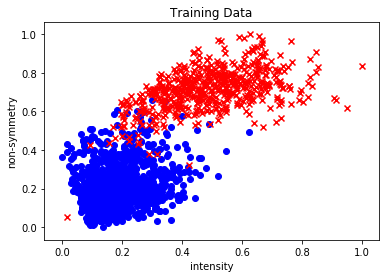

In [9]:
# Plotting training data features (Representation 1)
ones = np.where(train_labels == 1)
fives = np.where(train_labels == -1)
plt.scatter(traindatafe[ones, 0], traindatafe[ones, 1], color = 'b', marker = "o")
plt.scatter(traindatafe[fives, 0], traindatafe[fives, 1], color = 'r', marker = "x")
plt.xlabel("intensity")
plt.ylabel("non-symmetry")
plt.title("Training Data")
plt.show()

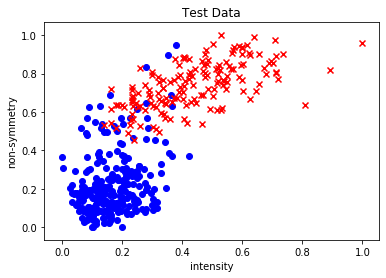

In [10]:
# Plotting test data features (Representation 1)
ones = np.where(test_labels == 1)
fives = np.where(test_labels == -1)
plt.scatter(testdatafe[ones, 0], testdatafe[ones, 1], color = 'b', marker = "o")
plt.xlabel("intensity")
plt.ylabel("non-symmetry")
plt.title("Test Data")
plt.scatter(testdatafe[fives, 0], testdatafe[fives, 1], color = 'r', marker = "x") 
plt.show()

**(15 points) Implementing Representation 2:** Come up with an alternative feature extraction approach. The features can again be 2-D, or higher dimensional. If you use any external resource, please cite the references. Explain the feature extraction procedure clearly in your report; if it is an algorithm, provide the algorithm; if it is a function, provide the mathematical expressions. 

If your proposed features are 2-D or 3-D, provide the scatter plots similar to the previous step.

We will refer this representation proposed by you as **Representation 2**.

In [11]:
# Feature Extraction for Representation 2
train_side_intensity = []
train_middle_intensity = []
test_side_intensity = []
test_middle_intensity = []

def Rep2_features(data_array):
    sum_of_side_averages = np.zeros(len(data_array))
    sum_of_middle_averages = np.zeros(len(data_array))
    for row in range(len(data_array)): # for each image in dataset
        image = data_array[row]
        image = np.array(image, dtype='float')
        image = image.reshape((16, 16))
        image = image.astype('float64')
        column_averages = np.mean(image, axis = 0) # evaluating column averages
        
        # sum of averages of side columns (1-4 & 13-16) and middle columns (5-12)
        sum_of_side_averages[row] = sum(column_averages[0:4]) + sum(column_averages[12:16])
        sum_of_middle_averages[row] = sum(column_averages[4:12])
    return sum_of_side_averages, sum_of_middle_averages

# training data feaature extraction
train_side_intensity, train_middle_intensity = Rep2_features(train_data)
# test data feaature extraction
test_side_intensity, test_middle_intensity = Rep2_features(test_data)

# stacking columns
train_rep2_fe = np.column_stack([np.asarray(normalize2(train_side_intensity)), np.asarray(normalize2(train_middle_intensity))]) 
test_rep2_fe = np.column_stack([np.asarray(normalize2(test_side_intensity)),np.asarray(normalize2(test_middle_intensity))])

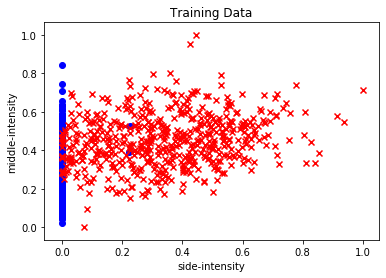

In [12]:
# Plotting train data features (Representation 2)
ones = np.where(train_labels == 1)
fives = np.where(train_labels == -1)
plt.scatter(train_rep2_fe[ones, 0], train_rep2_fe[ones, 1], color = 'b', marker = "o")
plt.scatter(train_rep2_fe[fives, 0], train_rep2_fe[fives, 1], color = 'r', marker = "x")
plt.xlabel("side-intensity")
plt.ylabel("middle-intensity")
plt.title("Training Data")
plt.show()

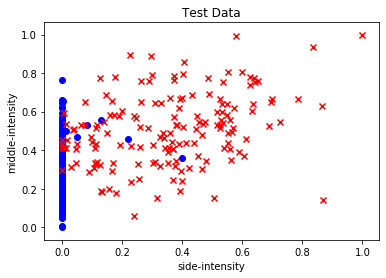

In [13]:
# Plotting test data features (Representation 2)
ones = np.where(test_labels == 1)
fives = np.where(test_labels == -1)
plt.scatter(test_rep2_fe[ones, 0], test_rep2_fe[ones, 1], color = 'b', marker = "o")
plt.xlabel("side-intensity")
plt.ylabel("middle-intensity")
plt.title("Test Data")
plt.scatter(test_rep2_fe[fives, 0], test_rep2_fe[fives, 1], color = 'r', marker = "x") 
plt.show()

## Task 2: Logistic Regression (40 Pts)

**(20 points)** Implement the logistic regression classifier from scratch with gradient descent and train it using Representation 1 and Representation 2 as inputs. Concatenate
1 to your features for the intercept term, such that one data point will look like for 2-D features [1,$x_1$,$x_2$], and the model vector will be [$w_0, w_1, w_2$], where $w_0$ is the intercept parameter. 
You can refer to lecture notes (Logistic regression slides 29-30) to review the gradient descent learning algorithm and the logistic loss. To implement the gradient of the logistic loss with respect to $w$, first derive its expression by hand. Please include your derivation in your report.

To prove that your implementation is converging, keep the loss values at each gradient descent iteration in a numpy array. After the training is finalized, plot the loss values
with respect to iteration count (Hint: `plt.plot`). You should observe a decreasing loss as the number of iterations increases. Also, experiment with 5 different learning rates between 0 and 1, and plot the convergence curves for each learning rate in the same plot to observe the effect of the learning rate (step size) on the convergence. 

To decide when to terminate the gradient descent iterations, check the absolute difference between the current loss value and the loss value of the previous step. If the difference is less than a small number, such as $10^{-5}$, you can exit the loop.

In [14]:
normalized_X = traindatafe      #normalized data
normalized_X2 = train_rep2_fe 
Y = np.maximum(train_labels, 0)  #change labels to 1:0 config

costgraph=[]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(w, X):
    z = np.array(w[0] + w[1]*np.array(X[:,0]) + w[2]*np.array(X[:,1])) #linear model dot product
    return sigmoid(z)

def cost(w, X, Y):
    y_pred = hypothesis(w, X)
    observations = len(Y)
    return  sum(-Y*np.log(y_pred) - (1-Y)*np.log(1-y_pred)) / observations
    
def partial_derivative(w, X, Y):
    y_pred = hypothesis(w, X)                       #1 - Get Predictions
    d = [0, 0, 0]                                     
    d[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred) 
    d[1] = -1 * sum(Y*(1-y_pred)*X[:,0] - (1-Y)*y_pred*X[:,0]) 
    d[2] = -1 * sum(Y*(1-y_pred)*X[:,1] - (1-Y)*y_pred*X[:,1]) 
    return d

def train_model(w, lr, X, Y):
    costp=cost(w, X, Y)
    i=0                                                     
    wnew=[0, 0, 0]
    while True:
        costp=cost(wnew, X, Y)  # updating the value
        costgraph.append(costp) #adding cost for graph
        w = wnew
        w0 = w[0] - lr*partial_derivative(w, X, Y)[0] 
        w1 = w[1] - lr*partial_derivative(w, X, Y)[1]
        w2 = w[2] - lr*partial_derivative(w, X, Y)[2]
        wnew = [w0, w1, w2]
        #print(wnew)
        #print("cost",cost(wnew, X, Y))
        costn=cost(wnew, X, Y)
        #print("abs",abs(costn-costp))                        # you may check convergence steps
        if abs(costn-costp)<pow(10,-4):
            print("Completed at",i,"steps")
            return wnew ,costn
        if i>2000:                                            # if there is no converge iteration num.
            print(i,"failure")
            return wnew ,costn
        i+=1


Completed at 157 steps
Completed at 340 steps
Completed at 467 steps
Completed at 700 steps
Completed at 937 steps


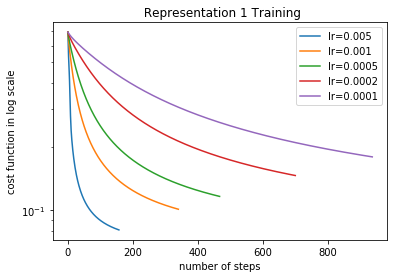

[0.3, 0.4, 0.5]

In [15]:
costgraph=[]
w = [0.3, 0.4, 0.5]
w1 = train_model(w, 0.005, normalized_X, Y)[0]
costgraph1=costgraph
costgraph=[]
w2 = train_model(w, 0.001, normalized_X, Y)[0]
costgraph2=costgraph
costgraph=[]
w3 = train_model(w, 0.0005, normalized_X, Y)[0]
costgraph3=costgraph
costgraph=[]
w4 = train_model(w, 0.0002, normalized_X, Y)[0]
costgraph4=costgraph
costgraph=[]
w5 = train_model(w, 0.0001, normalized_X, Y)[0]
costgraph5=costgraph

plt.plot(costgraph1,label='lr=0.005')
plt.plot(costgraph2,label='lr=0.001')
plt.plot(costgraph3,label='lr=0.0005')
plt.plot(costgraph4,label='lr=0.0002')
plt.plot(costgraph5,label='lr=0.0001')
plt.title(" Representation 1 Training")
plt.ylabel("cost function in log scale")
plt.yscale('log')
plt.xlabel("number of steps")
plt.legend()
plt.show()
w

Completed at 271 steps
Completed at 362 steps
Completed at 459 steps
Completed at 587 steps
Completed at 1018 steps


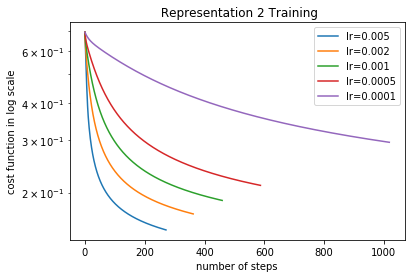

[0.3, 0.4, 0.5]

In [16]:
costgraph=[]
w = [0.3, 0.4, 0.5]
w1a = train_model(w, 0.005, normalized_X2, Y)[0]
costgraph6=costgraph
costgraph=[]
w2a= train_model(w, 0.002, normalized_X2, Y)[0]
costgraph7=costgraph
costgraph=[]
w3a = train_model(w, 0.001, normalized_X2, Y)[0]
costgraph8=costgraph
costgraph=[]
w4a = train_model(w, 0.0005, normalized_X2, Y)[0]
costgraph9=costgraph
costgraph=[]
w5a = train_model(w, 0.0001, normalized_X2, Y)[0]
costgraph10=costgraph

plt.plot(costgraph6,label='lr=0.005')
plt.plot(costgraph7,label='lr=0.002')
plt.plot(costgraph8,label='lr=0.001')
plt.plot(costgraph9,label='lr=0.0005')
plt.plot(costgraph10,label='lr=0.0001')
plt.title(" Representation 2 Training")
plt.ylabel("cost function in log scale")
plt.yscale('log')
plt.xlabel("number of steps")
plt.legend()
plt.show()
w

**(10 points)** Implement logistic regression with $\ell_2$ norm regularization, $||\mathbf{w}||_{2}^{2}$ . Show that your implementation is working by visualizing the loss over the iterations again. Visualization for a single learning rate and $\lambda$ suffices. 

In [17]:
#regularization

costgraph=[]

def costReg(w, X, Y,lambd):
    y_pred = hypothesis(w,X)
    obsv=len(Y)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred)) /obsv  - (lambd)*np.linalg.norm(w,ord=2) /obsv 

def partial_derivative2(w, X, Y,lmb):
    y_pred = hypothesis(w,X)                       #1 - Get Predictions
    g = [0]*3                                                    
    g[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred) - 2* w[0] * lmb
    g[1] = -1 * sum(Y*(1-y_pred)*X[:,0] - (1-Y)*y_pred*X[:,0]) - 2* w[1] * lmb
    g[2] = -1 * sum(Y*(1-y_pred)*X[:,1] - (1-Y)*y_pred*X[:,1]) - 2* w[2] * lmb
    return g

def train_model2(w,lr,X,Y,lmb):
    costp=costReg(w, X,Y, lmb)
    i=0                                                     
    wnew=[0,0,0]
    while True:
        costp=costReg(wnew, X, Y,lmb) # updating the value
        costgraph.append(costp) #adding cost for graph
        w = wnew
        w0 = w[0] - lr*partial_derivative2(w, X, Y,lmb)[0]
        w1 = w[1] - lr*partial_derivative2(w, X, Y,lmb)[1]
        w2 = w[2] - lr*partial_derivative2(w, X, Y,lmb)[2]
        wnew = [w0, w1, w2]
        #print(wnew)
        #print("cost",cost(wnew, X, Y))
        costn=costReg(wnew, X, Y,lmb)
        #print("abs",abs(costn-costp))                        # you may check convergence steps
        if abs(costn-costp)<pow(10,-4):
            print("Completed at",i,"steps")
            return wnew, costn
        if i>2000:                                            # if there is no converge iteration num.
            print(i,"failure")
            return wnew , costn
        i+=1


Completed at 158 steps


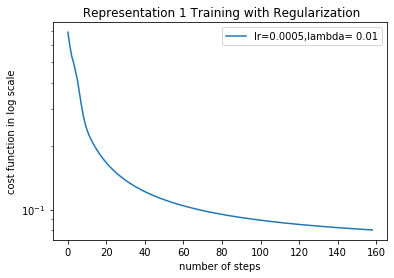

In [18]:
costgraph=[]
w = [0.3, 0.4, 0.5]
w1r = train_model2(w, 0.005, normalized_X, Y,0.01)[0]
costgraph11=costgraph

plt.plot(costgraph11,label='lr=0.0005,lambda= 0.01')
plt.title(" Representation 1 Training with Regularization")
plt.ylabel("cost function in log scale")
plt.yscale('log')
plt.xlabel("number of steps")
plt.legend()
plt.show()

Completed at 275 steps


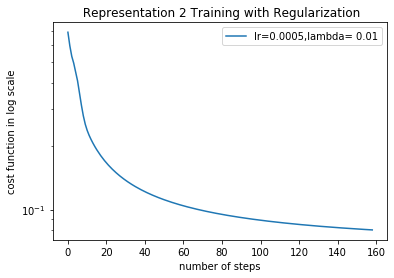

In [19]:
costgraph=[]
w = [0.3, 0.4, 0.5]
w6r = train_model2(w, 0.005, normalized_X2, Y,0.01)[0]
costgraph12=costgraph

plt.plot(costgraph11,label='lr=0.0005,lambda= 0.01')
plt.title(" Representation 2 Training with Regularization")
plt.ylabel("cost function in log scale")
plt.yscale('log')
plt.xlabel("number of steps")
plt.legend()
plt.show()

**(10 points)** Implement a 5-fold cross validation procedure to find the optimal $\lambda$ value for both Representation 1 and 2. Experiment with at least three different $\lambda$ values between 0 and 1. Report the mean/std of cross validation accuracy of every representation/parameter combination as a table and clearly mark the best configuration in your report. 

In [20]:
#Cross Validation
def cv(X,Y,lr,lamb):
    Z=np.column_stack([X,Y])
    np.random.shuffle(Z)
    totaldata=np.split(Z[0:1560],5)
    cvaccarray=[]
    for i in range(5):
        cvtestdata=totaldata[i]
        cvtraindata= np.concatenate(np.delete(totaldata,i,0),axis=0)
        cvweight,cvcost = train_model2(w,lr,cvtraindata[:,0:2], cvtraindata[:,2],lamb)
        cvaccarray.append(test_cv(cvweight,cvtestdata[:,0:2],cvtestdata[:,2]))
    return np.mean(cvaccarray),np.std(cvaccarray)


In [21]:
#Testing function specially for Cross Validation function
def test_cv(train_result_w, test_data_features, labels): #testing given certain weight,test data and test labels
    sig_Y = hypothesis(train_result_w, test_data_features)
    predicted_labels = [1 if x >= .5 else 0 for x in sig_Y]
    no_true = np.count_nonzero(predicted_labels == labels)
    no_false = len(sig_Y) - no_true
    return no_true/(no_true + no_false)

In [22]:
#Cv for 3 different lambda values
m1,std1=cv(normalized_X,Y,0.005,0.1)
m2,std2=cv(normalized_X,Y,0.005,0.01)
m3,std3=cv(normalized_X,Y,0.005,0.001)

m4,std4=cv(normalized_X2,Y,0.005,0.1)
m5,std5=cv(normalized_X2,Y,0.005,0.01)
m6,std6=cv(normalized_X2,Y,0.005,0.001)

Completed at 186 steps
Completed at 183 steps
Completed at 180 steps
Completed at 185 steps
Completed at 179 steps
Completed at 178 steps
Completed at 176 steps
Completed at 173 steps
Completed at 182 steps
Completed at 176 steps
Completed at 173 steps
Completed at 179 steps
Completed at 176 steps
Completed at 177 steps
Completed at 176 steps
Completed at 349 steps
Completed at 337 steps
Completed at 362 steps
Completed at 348 steps
Completed at 340 steps
Completed at 291 steps
Completed at 298 steps
Completed at 283 steps
Completed at 291 steps
Completed at 316 steps
Completed at 299 steps
Completed at 289 steps
Completed at 290 steps
Completed at 287 steps
Completed at 289 steps


In [23]:
#Table of results
df=pandas.DataFrame([[1,0.1,m1,std1],[1,0.01,m2,std2],[1,0.001,m3,std3],[2,0.1,m4,std4],[2,0.01,m5,std5],[2,0.001,m6,std6]]) 
df.columns=['Representation','Lambda','Mean Acc','Std']
print (df)

   Representation  Lambda  Mean Acc       Std
0               1   0.100  0.976923  0.004252
1               1   0.010  0.976923  0.007692
2               1   0.001  0.976282  0.007746
3               2   0.100  0.955128  0.004054
4               2   0.010  0.952564  0.019903
5               2   0.001  0.950641  0.009848


# Task 3: Evaluation (25 Pts)

**(5 points)** Train the logistic regression classifier on Representation 1 and 2 with the best learning rate you decide. Similarly, train the regularized logistic regression classifier with the best $\lambda$ you obtained by 5-fold cross validation. Report the training and test classification accuracy as 
\begin{align*}
\frac{\text{number of correctly classified samples}}{\text{total number of samples}}x100
\end{align*}

In [24]:
#Testing function
def test(train_result_w, test_data_features, labels): #testing given certain weight,test data and test labels
    sig_Y = hypothesis(train_result_w, test_data_features)
    predicted_labels = [1 if x >= .5 else -1 for x in sig_Y]
    no_true = np.count_nonzero(predicted_labels == labels)
    no_false = len(sig_Y) - no_true
    print("True:", no_true, ", False:", no_false)
    print("Accuracy:", no_true/(no_true + no_false))

**Logistic Regression Classifier**

In [25]:
rep1weight=train_model(w, 0.005, normalized_X, Y)[0]  #Representation 1
test(rep1weight,testdatafe,test_labels)                   #this is how to test our data

Completed at 157 steps
True: 403 , False: 21
Accuracy: 0.9504716981132075


In [26]:
rep2weight=train_model(w, 0.005, normalized_X2, Y)[0]  #Representation 2
test(rep2weight,test_rep2_fe,test_labels)                   

Completed at 271 steps
True: 396 , False: 28
Accuracy: 0.9339622641509434


**Regularized Logistic Regression Classifier**

In [38]:
rep1Rweight=train_model2(w, 0.005, normalized_X, Y,0.3)[0] #Representation 1
test(rep1Rweight,testdatafe,test_labels)                 

Completed at 154 steps
True: 404 , False: 20
Accuracy: 0.9528301886792453


In [34]:
rep2Rweight=train_model2(w, 0.005, normalized_X2, Y,0.5)[0] #Representation 2
test(rep2Rweight,test_rep2_fe,test_labels)                  

Completed at 167 steps
True: 398 , False: 26
Accuracy: 0.9386792452830188


**(15 points)** Visualize the decision boundary (the line that is given by $\mathbf{w}^{T}x=0$) obtained from the logistic regression classifier learned without regularization. For this purpose, use only Representation 1. Provide two scatter plots for training and test data points with the decision boundary shown on each of the plots.

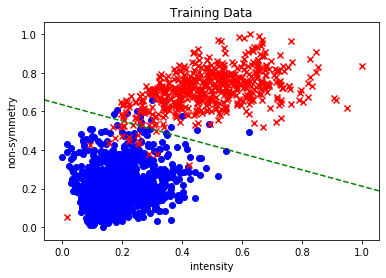

In [29]:
#Decision Boundary
ones = np.where(train_labels == 1)
fives = np.where(train_labels == -1)
plt.scatter(traindatafe[ones, 0], traindatafe[ones, 1], color = 'b', marker = "o")
plt.scatter(traindatafe[fives, 0], traindatafe[fives, 1], color = 'r', marker = "x")
plt.xlabel("intensity")
plt.ylabel("non-symmetry")
plt.title("Training Data")
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * w1[1] + w1[0])/w1[2]
plt.plot(x_vals, y_vals, '--', c="g")
plt.show()

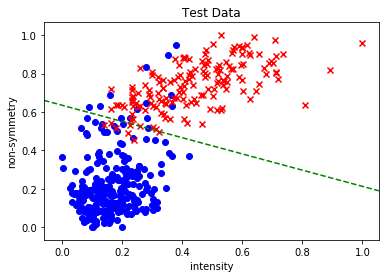

In [30]:
#Decision Boundary
ones = np.where(test_labels == 1)
fives = np.where(test_labels == -1)
plt.scatter(testdatafe[ones, 0], testdatafe[ones, 1], color = 'b', marker = "o")
plt.xlabel("intensity")
plt.ylabel("non-symmetry")
plt.title("Test Data")
plt.scatter(testdatafe[fives, 0], testdatafe[fives, 1], color = 'r', marker = "x")
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * w1[1] + w1[0])/w1[2]
plt.plot(x_vals, y_vals, '--', c="g")
plt.show()

**(5 points)** Comment on your work in your report. Include the answers for the following questions in your discussion. 

* Did regularization improve the generalization performance (did it help reducing the gap between training and test accuracies/errors)? Did you observe any difference between using Representation 1 and 2?
* Which feature set did give the best results? Which one is more discriminative?
* What would be your next step to improve test accuracy? 